# BIVARIATE ANALYSIS
- 2 variable

* **Numerical (Continuous) vs. Numerical (Continuous)**

In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# We load the pickle file so we have the correct data type

# df = pd.read_pickle('data_MPG_clean.pkl')

# or use csv file
df = pd.read_csv('data_MPG.csv')

In [30]:
# print 10 sample values: Helps in identifying numerical columns

print(df.sample(10))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
260  18.6          6         225.0       110.0    3620          18.7   
215  13.0          8         318.0       150.0    3755          14.0   
397  31.0          4         119.0        82.0    2720          19.4   
112  19.0          4         122.0        85.0    2310          18.5   
197  29.0          4          90.0        70.0    1937          14.2   
288  18.2          8         318.0       135.0    3830          15.2   
105  13.0          8         360.0       170.0    4654          13.0   
253  20.5          6         200.0        95.0    3155          18.2   
390  32.0          4         144.0        96.0    2665          13.9   
357  32.9          4         119.0       100.0    2615          14.8   

     model_year  origin                    name  
260          78     usa             dodge aspen  
215          76     usa              dodge d100  
397          82     usa              chevy s-10  
112    

In [31]:
# We can also check for numerical columns using info():
# float and int are indicators of numerical columns

print(df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 74.0 KB
None


# Numerical Columns
```
columns = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
```

- **cylinders, model_year** are not true numerical values. They have finite number of values. They fall under categorical values

# Scatter Plot

In [32]:
# Optional: Set palette and font for title, labels, etc

plt.style.use("dark_background")  
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["gold"])
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "lines.linewidth": 2.5
})


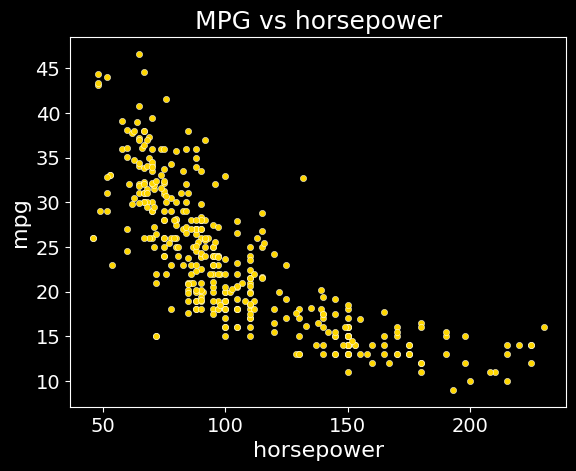

In [33]:
# step1: simple plot : mpg vs horsepower

col = "horsepower"

sns.scatterplot(data=df, x=col, y='mpg', s=20)

plt.title(f'MPG vs {col}')
plt.show()

### Observation:
- Downward trend → negative correlation
- Higher horsepower → lower mpg

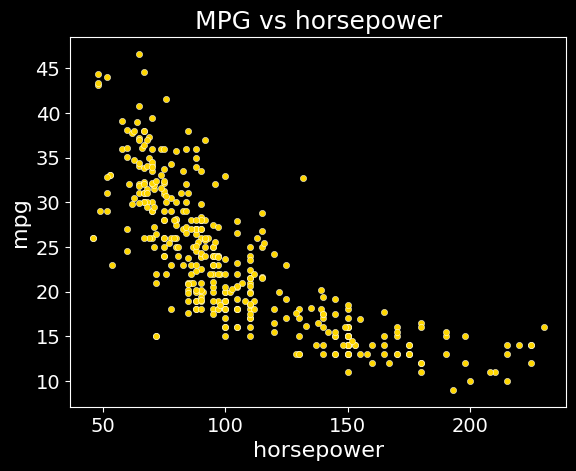

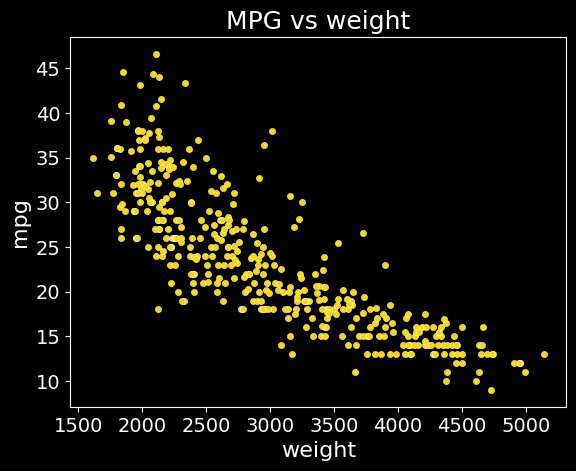

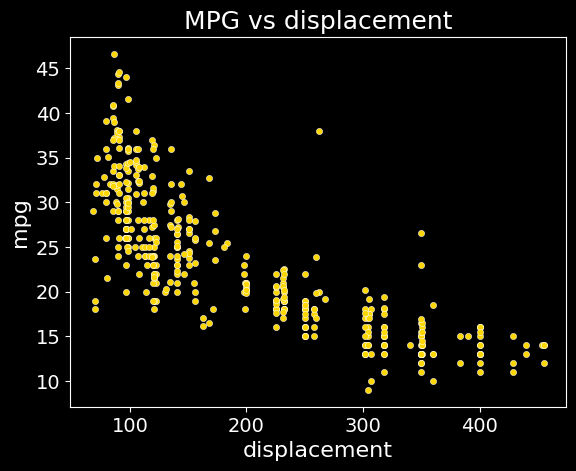

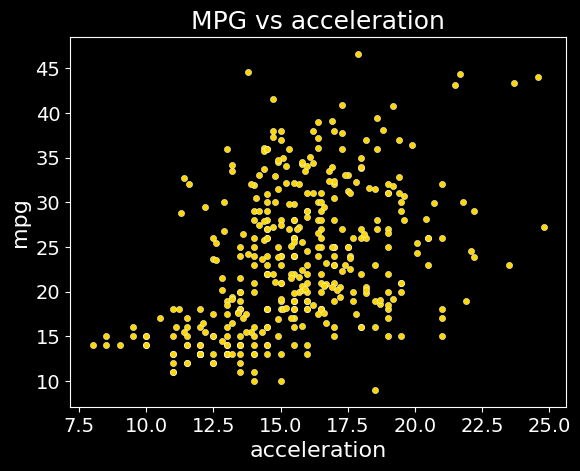

In [34]:
# step2: Use for loop: mpg vs ["horsepower", "weight", "displacement", "acceleration"]

columns = ["horsepower", "weight", "displacement", "acceleration"]

for col in columns:
    sns.scatterplot(data=df, x=col, y='mpg', s=20)
    plt.title(f'MPG vs {col}')
    plt.show()
    

# Observation: 
- As HP, weight, displacement increases, the MPG decrease.
- There appears weak relation between acceleration and MPG: as acceleration increases, mpg goes up. 

# Correlation

In [35]:
# step1: print numerical values

columns = ['mpg', 'horsepower', 'weight', 'acceleration']

corr_matrix = df[columns].corr()

print(corr_matrix)

                   mpg  horsepower    weight  acceleration
mpg           1.000000   -0.778427 -0.831741      0.420289
horsepower   -0.778427    1.000000  0.864538     -0.689196
weight       -0.831741    0.864538  1.000000     -0.417457
acceleration  0.420289   -0.689196 -0.417457      1.000000


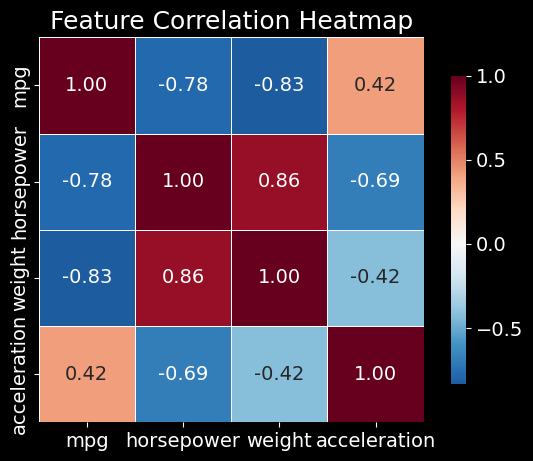

In [36]:
# step2: Now lets plot above using heatmap

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Feature Correlation Heatmap')
plt.show()

# Trend plot

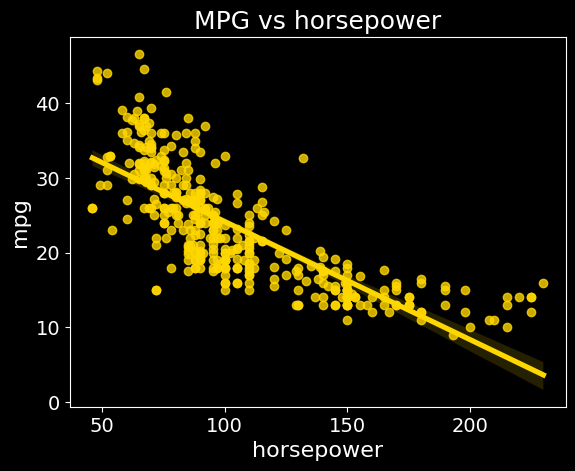

In [37]:
# step1: simple plot : mpg vs horsepower

col = "horsepower"

sns.regplot(data=df, x=col, y='mpg') # Regression line shows trend clearly.

plt.title(f'MPG vs {col}')
plt.show()


# Observation:
- Downward trend → negative correlation (-0.78)
- Higher horsepower → lower mpg

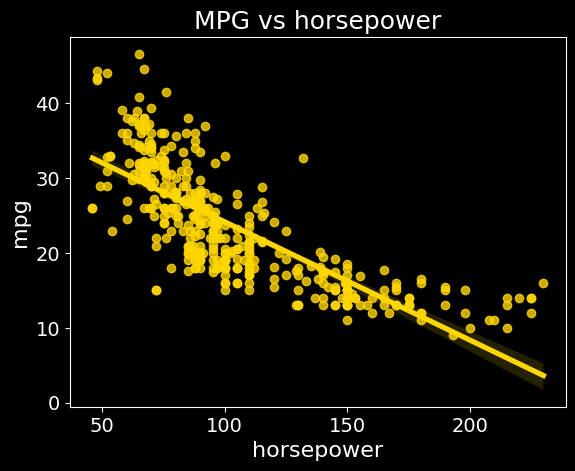

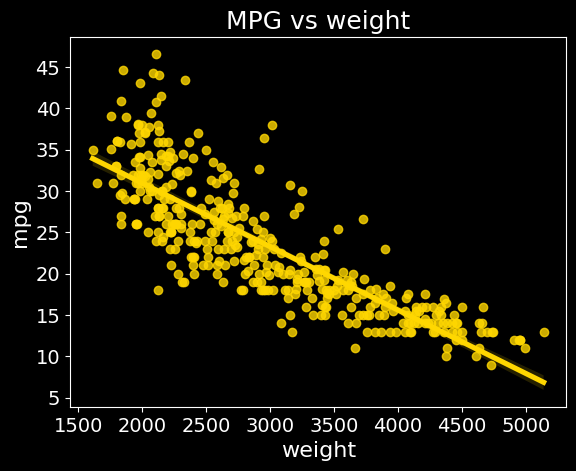

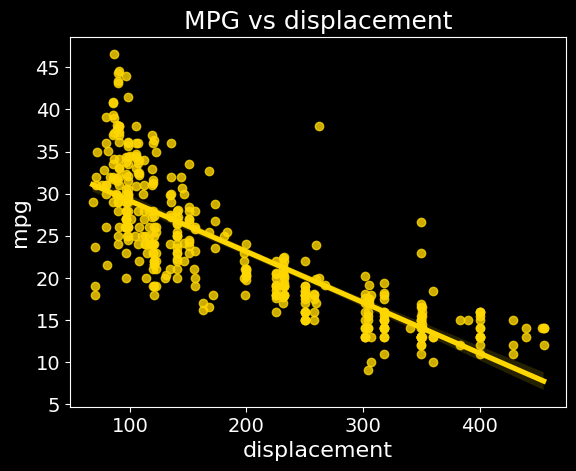

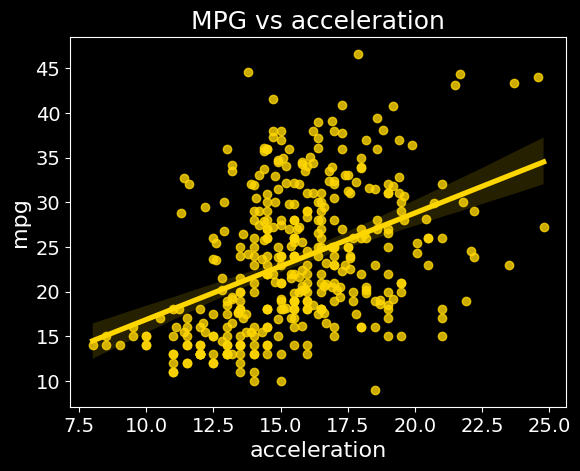

In [38]:
# step2: Use for loop: mpg vs ["horsepower", "weight", "displacement", "acceleration"]

columns = ["horsepower", "weight", "displacement", "acceleration"]

for col in columns:
    sns.regplot(data=df, x=col, y='mpg') # Regression line shows trend clearly.
    plt.title(f'MPG vs {col}')
    plt.show()
    

# observation 
- As HP, weight, displacement increases, the MPG decrease.
- There appears weak positive correlation relation between acceleration and MPG (0.42)